In [8]:
import sys
!{sys.executable} -m pip install -q ipywidgets widgetsnbextension
sys.path.append("../")

In [9]:
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [10]:
from collections import namedtuple
from launch import main
from utils.config_parser import ConfigParser
from train import Trainer

In [11]:
Flags = namedtuple("Flags", ["hyps", "opts"])

In [12]:
FLAGS = Flags("../configs/hyps.json", "../configs/nb_opts.json")

In [13]:
hyps, opts = ConfigParser.parse_configs(FLAGS.hyps, FLAGS.opts)
trainer = Trainer(opts, hyps)

In [14]:
trainer.setup()

In [15]:
trainer.run()

[2021-12-27 08:44:59.036 pytorch-1-6-gpu-py3-ml-g4dn-xlarge-4bc1f3597a3fd3d3d1e8cfe2e695:1480 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-12-27 08:44:59.129 pytorch-1-6-gpu-py3-ml-g4dn-xlarge-4bc1f3597a3fd3d3d1e8cfe2e695:1480 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
0.006551114842295647 torch.Size([32, 1, 24, 24])
-------------------------------
0.006650479044765234 torch.Size([32, 1, 24, 24])
-------------------------------
0.006528920028358698 torch.Size([32, 1, 24, 24])
-------------------------------


In [20]:
og, _ = next(iter(trainer.train_loader))

cuda:0 torch.Size([64, 1, 24, 24])


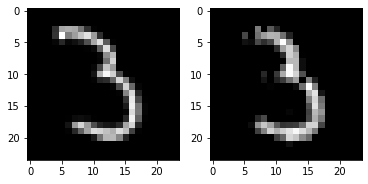

In [29]:
with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.imshow(og[0].squeeze(), cmap='gray')
    img = og.to(trainer.device)
    encoded, recon = trainer.model.network(img)
    print(recon.device, recon.shape)
    plt.subplot(1, 2, 2)
    plt.imshow(recon.cpu().detach()[0].squeeze(), cmap='gray')